<a href="https://colab.research.google.com/github/epb378/FRET-simulator/blob/master/fretsimulator2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded=files.upload()

Saving green extinction coefficient.csv to green extinction coefficient.csv
Saving red extinction coefficient.csv to red extinction coefficient.csv
Saving blue extinction coefficient.csv to blue extinction coefficient.csv
Saving bluemolem.csv to bluemolem.csv
Saving greenmolem.csv to greenmolem.csv
Saving redmolem.csv to redmolem.csv


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(array([ 84., 147., 198., 346., 387., 513., 548., 661., 698., 552., 666.,
        572., 602., 507., 645., 551., 528., 568., 332., 329., 170., 138.,
         98.,  42.,  42.,  20.,  24.,  10.,   8.,   7.,   3.,   1.,   1.,
          0.,   2.]),
 array([350.        , 358.57142857, 367.14285714, 375.71428571,
        384.28571429, 392.85714286, 401.42857143, 410.        ,
        418.57142857, 427.14285714, 435.71428571, 444.28571429,
        452.85714286, 461.42857143, 470.        , 478.57142857,
        487.14285714, 495.71428571, 504.28571429, 512.85714286,
        521.42857143, 530.        , 538.57142857, 547.14285714,
        555.71428571, 564.28571429, 572.85714286, 581.42857143,
        590.        , 598.57142857, 607.14285714, 615.71428571,
        624.28571429, 632.85714286, 641.42857143, 650.        ]),
 <a list of 35 Patch objects>)

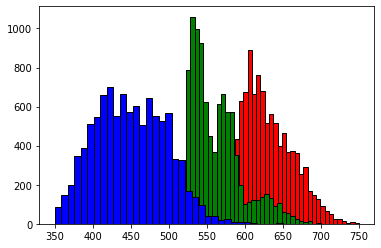

In [3]:

import scipy
import numpy as np
from scipy import stats
reddata=np.loadtxt('redmolem.csv',delimiter=',')
redwavelength=reddata[:,0]
greendata=np.loadtxt('greenmolem.csv',delimiter=',')
greenwavelength=greendata[:,0]
bluedata=np.loadtxt('bluemolem.csv',delimiter=',')
bluewavelength=bluedata[:,0]
redprob=reddata[:,1]
greenprob=greendata[:,1]
blueprob=bluedata[:,1]
redcustm = stats.rv_discrete(name='redcustm', values=(redwavelength, redprob))
greencustm = stats.rv_discrete(name='greencustm', values=(greenwavelength, greenprob))
bluecustm = stats.rv_discrete(name='bluecustm', values=(bluewavelength, blueprob))
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(redcustm.rvs(size=10000), color = 'red', edgecolor = 'black',
         bins = int((700-350)/10)) #plot randomly sampled wavelngths from emission distribution
plt.hist(greencustm.rvs(size=10000), color = 'green', edgecolor = 'black',
         bins = int((700-350)/10)) #plot randomly sampled wavelngths from emission distribution
plt.hist(bluecustm.rvs(size=10000), color = 'blue', edgecolor = 'black',
         bins = int((700-350)/10)) #plot randomly sampled wavelngths from emission distribution
#print(custm.rvs(size=100))

In [0]:
def populategrid(molecules,Nr,Ng,Nb, Xmax, Ymax, Zmax):
  from random import randint

  Ntot=Ng+Nr+Nb
  
  for i in range (0,Ntot):
    
    molecules[i,1]=randint(1,Xmax)
    molecules[i,2]=randint(1,Ymax)
    molecules[i,3]=randint(1,Zmax)
    if i>0:
        for j in range(0,i):
            if molecules[i,1]==molecules[j,1] and molecules[i,2]==molecules[j,2] and molecules[i,3]==molecules[j,3]:
                i = i-1
  return molecules

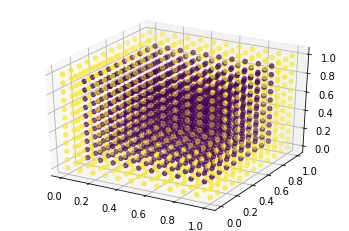

molecule is number 
20
molecule is 
blue
non-radiative recombination, bozo
molecule is 
blue
non-radiative recombination, bozo
molecule is 
blue
non-radiative recombination, bozo
molecule is 
blue
non-radiative recombination, bozo
molecule is 
blue
molecule is 
blue
molecule is 
blue
non-radiative recombination, bozo
molecule is 
blue
molecule is 
blue
non-radiative recombination, bozo
molecule is 
blue
non-radiative recombination, bozo
molecule is 
blue
molecule is 
blue
non-radiative recombination, bozo
molecule is 
blue
non-radiative recombination, bozo
molecule is 
blue
non-radiative recombination, bozo
molecule is 
blue
molecule is 
blue
non-radiative recombination, bozo
molecule is 
blue
non-radiative recombination, bozo
molecule is 
blue
non-radiative recombination, bozo
molecule is 
blue
non-radiative recombination, bozo
molecule is 
blue
non-radiative recombination, bozo
molecule is 
blue
non-radiative recombination, bozo
molecule is 
blue
non-radiative recombination, bozo
mol

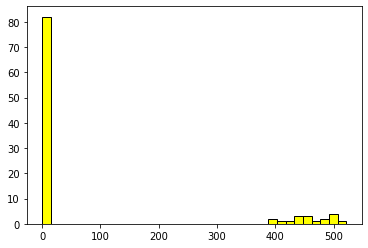

In [8]:
from mpl_toolkits.mplot3d import Axes3D #(3D scatter https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html)
#import numpy as np
import matplotlib.pyplot as plt
import math
import random
#set up grid of Xmax*Ymax*Zmax points
Xmax, Ymax, Zmax = 10, 10, 10
x = np.linspace(0,1,Xmax+2)
y = np.linspace(0,1,Ymax+2)
z = np.linspace(0,1,Zmax+2)
X,Y,Z = np.meshgrid(x,y,z)
positions = np.vstack([Z.ravel(),Y.ravel(),X.ravel()])
Ros=np.array([[4,2,1],[0.01,4,2],[0.01,0.01,4]])
PLQEs=np.array([0.2,0.9,0.95])
is_perimeter = (positions[0]==np.min(y)) | (positions[0] ==np.max(y)) | (positions[1]==np.min(x)) | (positions[1] ==np.max(x)) | (positions[2]==np.min(z)) | (positions[2] ==np.max(z))

fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*positions[::1], c=is_perimeter)
plt.show()
#populate grid with Nb blue molecules, Ng greens, and Nr reds
Nb = 20
blues=np.ones([Nb,1])
gtb=1
Ng = Nb*gtb
greens=np.ones([Ng,1])
greens=greens*2
rtg=0.1
Nr = math.floor(Ng*rtg)
reds=np.ones([Nr,1])
reds=reds*3 
Ntot=Nb+Ng+Nr
molecules=np.concatenate((reds,greens,blues))
#print(molecules)
np.random.shuffle(molecules)
rest=np.zeros([Ntot,4])
molecules=np.concatenate((molecules,rest), axis=1)
molecules=populategrid(molecules,Nr,Ng,Nb, Xmax, Ymax, Zmax)
#k=0
#for i in range (0,Ntot):
#    k=k+1
#    molecules[i,1]=random.randint(1,Xmax)
#    molecules[i,2]=random.randint(1,Ymax)
#    molecules[i,3]=random.randint(1,Zmax)
#    if i>0:
#        for j in range(0,i):
#            if molecules[i,1]==molecules[j,1] and molecules[i,2]==molecules[j,2] and molecules[i,3]==molecules[j,3]:
#                i = i-1

#checking if my array is actually unique
#check=np.zeros([Ntot,1])
#check=10000*molecules[:,1] + 100*molecules[:,2] +molecules[:,3]
#uniquearrays , uniqueindices = np.unique(check, return_index=True)
distances=np.zeros([Ntot,Ntot])
Pfret=np.zeros([Ntot,Ntot])
Prad=np.zeros([Ntot,Ntot])

for i in range (0,Ntot):
    for j in range(0,Ntot):
        distances[i,j]=np.sqrt((molecules[i,1]-molecules[j,1])**2 + (molecules[i,2]-molecules[j,2])**2 + (molecules[i,3]-molecules[j,3])**2)
ticks=100
outspectrum=np.zeros([ticks])
findblues=np.where(molecules[:,0]==1)
bluesarray=findblues[0]
excitint=random.randint(0,Nb-1)
excitindex=bluesarray[excitint]
print("molecule is number ")
print( excitindex)
molecules[excitindex,4]=1
zeroNtot=np.arange(Ntot)
zeroNtot.shape=(Ntot,1)
for i in range (0,ticks):
#    print(i)
    color=molecules[excitindex,0]
    somethinghappened=0
    closest=1
    print("molecule is ")
    if color==1:
      print("blue")
    elif color==2:
      print("green")
    elif color==3:
      print("red")
    while somethinghappened == 0:
        a=distances[:,excitindex] #find distances to closest molecules
        a.shape=(Ntot,1)
        indexeddistances= np.concatenate((zeroNtot,a), axis=1)
        indexeddistances= indexeddistances[indexeddistances[:,1].argsort()] #find index of closest molecule
        if molecules[int(indexeddistances[closest,0]),0] > molecules[excitindex,0]:
            dice=np.random.random()
            Pfret=1/(1+(indexeddistances[closest,1]/Ros[int(molecules[excitindex,0]-1),int(molecules[int(indexeddistances[closest,0]),0]-1)])**6) #fret probability
            Pem=Pfret + (1-Pfret)*PLQEs[int(molecules[excitindex,0]-1)]
            if dice<=Pfret:
                molecules[excitindex,4]=0
                molecules[int(indexeddistances[closest,0]),4]=1
                excitindex=int(indexeddistances[closest,0])
#                print("FRET")
                somethinghappened=1
            elif Pfret< dice <= Pem:
                if color==3:
                  outspectrum[i]=redcustm.rvs()
                  #print(redcustm.rvs())
                elif color==2:
                  outspectrum[i]=greencustm.rvs()
                  #print(greencustm.rvs())
                else:
                  outspectrum[i]=bluecustm.rvs()
                  #print(bluecustm.rvs()) #blue
                  #
                #print("emitted")
                #print(molecules[excitindex,0])
                #print("light")    
                somethinghappened=1
                i=ticks
            else:
                print("non-radiative recombination, bozo")
                somethinghappened=1
        else:
            closest= closest+1
            if closest==Ntot:
              break
    if closest==Ntot:
      print(i)
      break
print('had to exit loops')
plt.hist(outspectrum, color = 'yellow', edgecolor = 'black',
         bins = int((700-350)/10)) 
outnonzero=np.count_nonzero(outspectrum)

outPLQE=outnonzero/(i)
print('PLQE=')
print(outPLQE)

(array([12.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  9., 31., 15., 16.,  3.,  8.,  1.,  5.]),
 array([  0.        ,  18.91428571,  37.82857143,  56.74285714,
         75.65714286,  94.57142857, 113.48571429, 132.4       ,
        151.31428571, 170.22857143, 189.14285714, 208.05714286,
        226.97142857, 245.88571429, 264.8       , 283.71428571,
        302.62857143, 321.54285714, 340.45714286, 359.37142857,
        378.28571429, 397.2       , 416.11428571, 435.02857143,
        453.94285714, 472.85714286, 491.77142857, 510.68571429,
        529.6       , 548.51428571, 567.42857143, 586.34285714,
        605.25714286, 624.17142857, 643.08571429, 662.        ]),
 <a list of 35 Patch objects>)

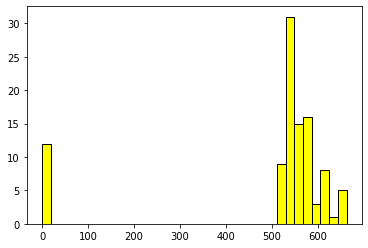